In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

In [2]:
data = pd.read_csv('Nat_Gas.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.sort_index(inplace=True)

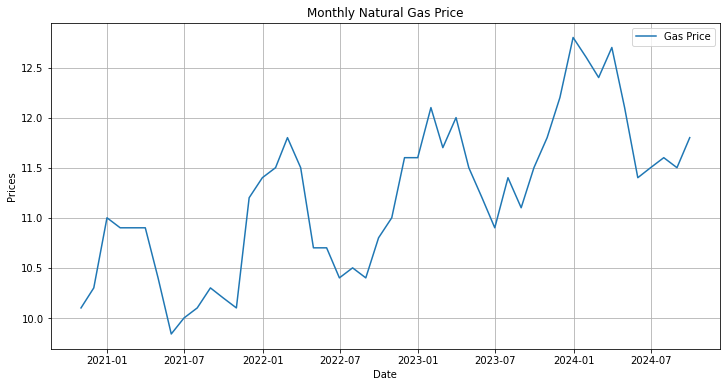

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(data['Prices'], label='Gas Price')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.title('Monthly Natural Gas Price')
plt.legend()
plt.grid(True)
plt.show()


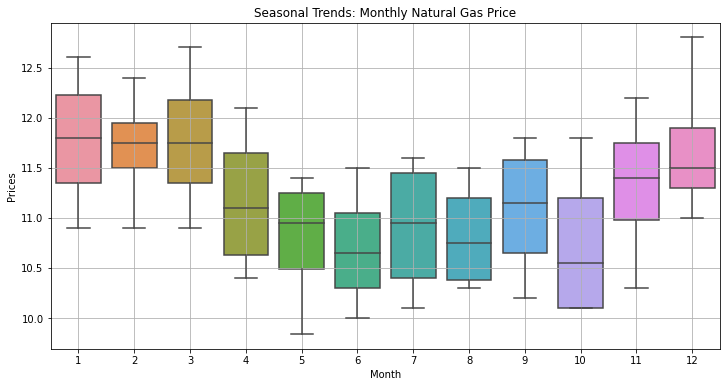

In [4]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=data.index.month, y=data['Prices'])
plt.xlabel('Month')
plt.ylabel('Prices')
plt.title('Seasonal Trends: Monthly Natural Gas Price')
plt.grid(True)
plt.show()

In [5]:
def estimate_gas_price(input_date):
    # Fit the ARIMA model
    model = ARIMA(data['Prices'].values, order=(2, 1, 2))
    model_fit = model.fit()


    future_date = input_date + pd.DateOffset(years=1)
    future_price = model_fit.forecast(steps=12)[0]

    estimated_price = model_fit.forecast(steps=1)[0]

    return estimated_price, future_date, future_price

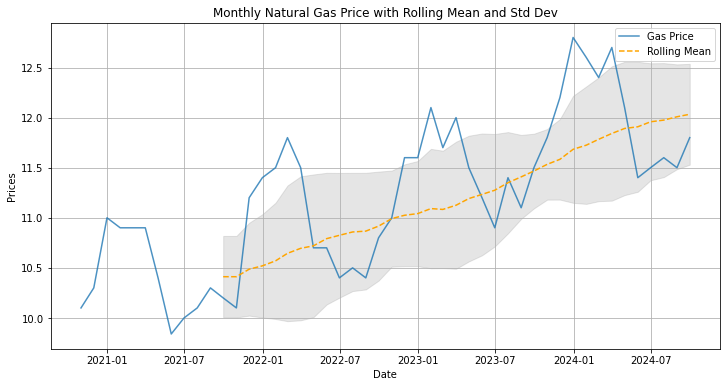

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(data['Prices'], label='Gas Price', alpha=0.8)
plt.plot(data['Prices'].rolling(window=12).mean(), label='Rolling Mean', color='orange', linestyle='--')
plt.fill_between(data.index, data['Prices'].rolling(window=12).mean() - data['Prices'].rolling(window=12).std(),
                 data['Prices'].rolling(window=12).mean() + data['Prices'].rolling(window=12).std(), color='gray', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Prices')
plt.title('Monthly Natural Gas Price with Rolling Mean and Std Dev')
plt.legend()
plt.grid(True)
plt.show()

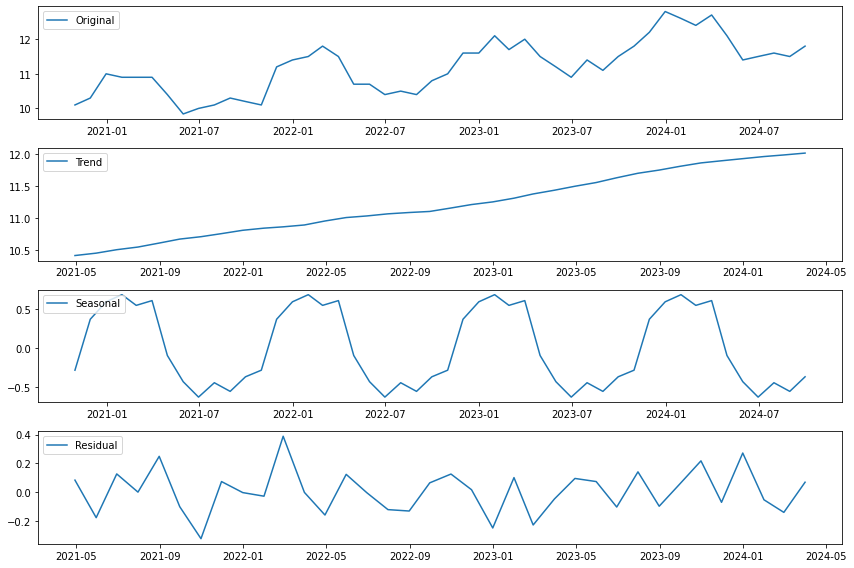

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['Prices'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(data['Prices'], label='Original')
plt.legend(loc='upper left')
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()